# Shelter animal outcome

많은 사람들이 반려동물을 가족으로 맞이하고 있다. 2018년 반려동물 등록 시스템에 신규 등록된 개체수가 14만 마리였는데 1년 사이에 약 443% 증가하여 2019년에는 약 79만 마리가 신규 등록되어 총 약 210만 마리의 반려동물이 등록되어 있다. 
반려동물의 수가 늘어나는 만큼 유기동물의 수 역시 증가하고 있다. 2017년에는 구조된 유기동물의 수가 102,593마리였던 것이 비해 2019년에는 약 32% 증가한 135,791마리였다. 유기된 동물의 최후는 어떨까? 누군가는 다행히 원 주인에게 돌아가거나 재입양이 되지만 일부는 안락사를 당하거나 보호소에서 죽음을 맞이한다. 

그렇다면 어떤 동물이 입양이 되어 행복한 결말을 맞이할까? 반려동물의 우리 삶 속에 깊숙히 들어온 만큼 이들의 복지와 안락한 삶에 대한 고민이 지속적으로 이루어져야 한다고 생각한다. 본 프로젝트에서는 미국의 오스틴 유기동물 보호소 데이터를 분석하여 유기동물 보호소의 동물의 입양 가능성을 예측하는 모델을 만들어보고자 한다. 이 모델을 통해 유기동물 보호소의 입양가능성을 높일 수 있는 요인을 분석하고 이를 바탕으로 입양홍보 및 보호소의 효과적인 운영안에 대해 제시하고자 한다. 

* 사용 데이터 : Austin Animal Center Shelter Intakes and Outcomes
* 문제 : multi class classification
* 분석 목표 : 보호소 동물들의 결과를 예측하고 결과에 영향을 미치는 요인을 이해
* 활용 방안 : 보호소 동물들에게 유리한 결과를 도출하기 위한 방안 제시(특히 입양 확률을 높이기 위한 방안) 

In [ ]:
! pip install -U scikit-learn
! pip install pandas-profiling==2.7.1
! pip install --upgrade category_encoders
! pip install pdpbox
! pip install shap
! pip install -c conda-forge xgboost
! pip install eli5
! pip install -c conda-forge lightgbm

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 256kB 15.8MB/s 
     |████████████████████████████████| 3.2MB 41.9MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 1.1MB 46.0MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 296kB 33.7MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=9d912fb061631e59f8b79da7ac642372558b03e0b01a4ec950924f2969a4494f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=e5b3045dbd964b21b8fc269ce701812cdec17d7d42c2869617090382a0008f3f
  Stored in directory: /root/.cache/pip/whe

     |████████████████████████████████| 358kB 16.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491619 sha256=877070c6267546dac41db02ed51240e416e5a90798fca5e0adf481a2007cf0c0
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'
     |████████████████████████████████| 112kB 15.8MB/s 
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


## Load Data

- Austin Animal Shelter intake and outcome data
- 해당 보호소는 매년 평균 16000마리의 동물을 수용하고 있으며 2013년부터의 데이터가 축적되어 있어서 보호소 동물들의 입양 가능성을 예측하기에 적절한 양의 데이터라고 보았다. 
- 이번 프로젝트는 보호소 동물들의 결과를 예측하는 다중클래스 분류 문제(multi-class classification)이다.
- 원 주인에게 돌아감(Return to Owner), 입양(Adoption), 다른 기관으로 이송(Transfer), 기타(Other, 사망, 안락사, 실종 등을 포함) 등의 결과를 예측하고 각각의 결과에 영향을 미치는 요인을 분석하고자 한다. 
- 결과적으로 모델을 통해 보호소의 동물들에게 유리한 방향의 결과가 나올 수 있는 방안을 제안하고자 한다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
shl_intake = pd.read_csv('/content/drive/MyDrive/Austin_Animal_Center_Intakes.csv')
shl_outcome = pd.read_csv('/content/drive/MyDrive/Austin_Animal_Center_Outcomes.csv')

In [ ]:
#shelter intake information
print(shl_intake.shape)
shl_intake.head(3)

(125556, 12)


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White


In [ ]:
#shelter outcome information
print(shl_outcome.shape)
shl_outcome.head(3)

(125768, 12)


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray


## Wrangling

### Merging

In [ ]:
(shl_intake.DateTime==shl_intake.MonthYear).sum() #두 칼럼 같음 -> 하나 삭제 
shl_intake = shl_intake.drop('MonthYear', axis=1) 
shl_intake.rename(columns = {'DateTime' : 'intake_datetime'}, inplace = True) #칼럼이름 변경

In [ ]:
shl_intake.head(1)

,Animal ID,Name,intake_datetime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor


In [ ]:
(shl_outcome['DateTime']==shl_outcome['MonthYear']).sum() #두 칼럼 같음 -> 하나 삭제 
shl_outcome = shl_outcome.drop('MonthYear', axis=1) 
shl_outcome.rename(columns = {'DateTime' : 'outcome_datetime'}, inplace = True) #rename datetime

In [ ]:
shl_outcome.head(1)

,Animal ID,Name,outcome_datetime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White


In [ ]:
#merging intake and outcome
shl = pd.merge(shl_intake, shl_outcome, how='inner', on=['Animal ID','Animal Type','Breed','Color','Name'])

In [ ]:
shl.head(1)

,Animal ID,Name,intake_datetime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,outcome_datetime,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,01/08/2019 03:11:00 PM,01/03/2017,Transfer,Partner,Neutered Male,2 years


In [ ]:
#drop duplicated
shl = shl.loc[shl['Animal ID'].drop_duplicates('last').index]

In [ ]:
print(shl.shape)
shl.head()

(111628, 17)


,Animal ID,Name,intake_datetime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,outcome_datetime,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,01/08/2019 03:11:00 PM,01/03/2017,Transfer,Partner,Neutered Male,2 years
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Spayed Female,8 years
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Neutered Male,1 year
3,A665644,NaN,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Intact Female,4 weeks
4,A682524,Rio,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Neutered Male,4 years


In [ ]:
shl.columns

Index(['Animal ID', 'Name', 'intake_datetime', 'Found Location', 'Intake Type',
       'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Age upon Intake',
       'Breed', 'Color', 'outcome_datetime', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome'],
      dtype='object')

In [ ]:

col = ['Animal ID', 'Name', 'intake_datetime', 'Found Location', 'Intake Type',
       'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Age upon Intake',
       'Breed', 'Color', 'outcome_datetime', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome']

col = [i.lower() for i in col]
col
col = ['animal_id', 'name', 'intake_datetime', 'found_location', 'intake_type', 'intake_condition', 'animal_type', 'sex_upon_intake', 'age_upon_intake', 'breed', 'color', 'outcome_datetime', 'date_of_birth', 'outcome_type', 'outcome_subtype', 'sex_upon_outcome', 'age_upon_outcome']

shl.columns=col
shl.head()

,animal_id,name,intake_datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,outcome_datetime,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,01/08/2019 03:11:00 PM,01/03/2017,Transfer,Partner,Neutered Male,2 years
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Spayed Female,8 years
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Neutered Male,1 year
3,A665644,NaN,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Intact Female,4 weeks
4,A682524,Rio,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Neutered Male,4 years


In [ ]:
from pandas_profiling import ProfileReport
shl = shl.reset_index(drop=True)
ProfileReport(shl)

### missing values

In [ ]:
shl.isna().sum()

animal_id               0
name                38911
intake_datetime         0
found_location          0
intake_type             0
intake_condition        0
animal_type             0
sex_upon_intake         1
age_upon_intake         0
breed                   0
color                   0
outcome_datetime        0
date_of_birth           0
outcome_type           27
outcome_subtype     56589
sex_upon_outcome        2
age_upon_outcome       14
dtype: int64

In [ ]:
def na_process(shl) :
    #outcome_type
    idx = shl[shl.outcome_type.isna()].index
    shl = shl.drop(idx).reset_index(drop=True)

    #age_upon_outcome

    shl.outcome_datetime = pd.to_datetime(shl.outcome_datetime)
    shl.date_of_birth = pd.to_datetime(shl.date_of_birth)

    age_na = shl[shl.age_upon_outcome.isna()]
    age = (age_na.outcome_datetime - age_na.date_of_birth).dt.days
    shl.loc[shl.age_upon_outcome.isna(),'age_upon_outcome'] = age

    #sex_upon_intake/ sex_upon_outcome 
    freq = shl.loc[(shl.outcome_type=='Return to Owner') & (shl.animal_type=='Dog'), 'sex_upon_intake'].mode()[0]
    shl.sex_upon_intake = shl.sex_upon_intake.fillna(freq)

    freq = shl.loc[(shl.outcome_type=='Return to Owner') & (shl.animal_type=='Dog'), 'sex_upon_outcome'].mode()[0]
    shl.sex_upon_outcome  = shl.sex_upon_outcome .fillna(freq)

    #outcome_subtype -> na 의미 있음
    shl.outcome_subtype = shl.outcome_subtype.fillna(1)
    
    #adoption_1 = 보호소에서 바로 입양 -> direct
    #died_1은 아래 사유가 아닌 사망 -> ect
    #Disposal_1 은 그냥 Disposal
    #Euthanasia_1은 기타사유 -> ect
    #Missing_1 -> ect
    #Return_to_owner_1=Return_to_owner ->Return_to_owner
    #Rto-Adopt_1 -> return to owner through the adoption processs due to certain reason(unknown)
    #Relocate_1	-> 그냥 relocate
    #Transfer_1은 기타사유 -> ect

    return shl


In [ ]:
shl = na_process(shl)
shl.isna().sum()

animal_id               0
name                38899
intake_datetime         0
found_location          0
intake_type             0
intake_condition        0
animal_type             0
sex_upon_intake         0
age_upon_intake         0
breed                   0
color                   0
outcome_datetime        0
date_of_birth           0
outcome_type            0
outcome_subtype         0
sex_upon_outcome        0
age_upon_outcome        0
dtype: int64

### features engineering

In [ ]:
def feature_egineering(shl) :
    #have name
    shl['have_name'] = shl.name.notna()
    
    #age_intake
    shl.intake_datetime = pd.to_datetime(shl.intake_datetime)
    shl['age_intake_clean'] = (shl.intake_datetime - shl.date_of_birth).dt.days

    #age_outcome 
    shl['age_outcome_clean'] = (shl.outcome_datetime - shl.date_of_birth).dt.days

    #drop age<0
    con = (shl['age_intake_clean']<0)|(shl['age_outcome_clean']<0)
    idx = shl[con].index
    shl = shl.drop(idx)

    #is_adult
    shl['is_adult']=shl.age_outcome_clean>=365

    #time duration
    shl['duration']=shl.outcome_datetime-shl.intake_datetime
    shl['duration'] = (shl.duration / np.timedelta64(1, 'D')).astype('int')

    #time duration이 마이너스인 것은 삭제
    idx=shl[(shl['duration']<0)].index
    shl = shl.drop(idx)
    
    #year, month, day
    shl['intake_year'] = shl.intake_datetime.dt.year
    shl['intake_month'] = shl.intake_datetime.dt.month
    shl['intake_day'] = shl.intake_datetime.dt.day

    shl['outcome_year'] = shl.outcome_datetime.dt.year
    shl['outcome_month'] = shl.outcome_datetime.dt.month
    shl['outcome_day'] = shl.outcome_datetime.dt.day
  
    #sex
    shl['sex']=shl.sex_upon_intake
    shl['sex'] = (shl['sex_upon_intake']
                  .replace('Neutered Male','male')
                  .replace('Intact Male','male')
                  .replace('Spayed Female','female')
                  .replace('Intact Female','female')
                 )
    
    #is_neutered(intake, outcome)
    shl['is_neutered_intake']=shl.sex_upon_intake
    shl['is_neutered_intake'] = (shl['is_neutered_intake']
                  .replace('Neutered Male','neutered')
                  .replace('Intact Male','intact')
                  .replace('Spayed Female','neutered')
                  .replace('Intact Female','intact')
                 )

    shl['is_neutered_outcome']=shl.sex_upon_outcome
    shl['is_neutered_outcome'] = (shl['is_neutered_outcome']
                  .replace('Neutered Male','neutered')
                  .replace('Intact Male','intact')
                  .replace('Spayed Female','neutered')
                  .replace('Intact Female','intact')
             )
    #is_mixed
    shl['is_mix'] = shl.breed.str.contains('Mix')
    shl['is_know']= shl.breed.str.contains('/')
    shl['mixed']=1+(shl['is_mix']*2)+shl['is_know']
    shl.loc[shl.mixed==4, 'mixed']=3
    shl['mixed'].value_counts() #1:pure 2:known mix 3:unknown mix
    shl=shl.drop(['is_mix','is_know'], axis=1)

    #color
    shl['is_black']=shl.color.str.contains('Black')

    #set_index
    shl = shl.set_index('animal_id')

    #rearrange columns
    shl = shl[['name', 'intake_datetime', 'found_location', 'intake_type',
       'intake_condition', 'animal_type', 'sex_upon_intake', 'age_upon_intake',
       'breed', 'color', 'outcome_datetime', 'date_of_birth','sex_upon_outcome', 'age_upon_outcome', 'have_name',
       'age_intake_clean', 'age_outcome_clean', 'is_adult', 'duration',
       'intake_year', 'intake_month', 'intake_day', 'outcome_year',
       'outcome_month', 'outcome_day', 'sex', 'is_neutered_intake',
       'is_neutered_outcome', 'mixed', 'is_black','outcome_type',
       'outcome_subtype']]

    #target variable
    #rto-Adopt = return to owner
    #relocate -> transfer
    #missing + disposal + died + euthanasia -> other
    #reorganize it into 4 classes in total (adoption, transfer, rto, other)

    shl.outcome_type = (shl.outcome_type
                        .replace('Relocate','Transfer')
                        .replace('Missing', 'Other')
                        .replace('Rto-Adopt', 'Return to Owner')
                        .replace('Disposal', 'Other')
                        .replace('Died', 'Other')
                        .replace('Euthanasia','Other')
                        )
    return shl

In [ ]:
shl = feature_egineering(shl)
shl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108808 entries, A786884 to A827317
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 70065 non-null   object        
 1   intake_datetime      108808 non-null  datetime64[ns]
 2   found_location       108808 non-null  object        
 3   intake_type          108808 non-null  object        
 4   intake_condition     108808 non-null  object        
 5   animal_type          108808 non-null  object        
 6   sex_upon_intake      108808 non-null  object        
 7   age_upon_intake      108808 non-null  object        
 8   breed                108808 non-null  object        
 9   color                108808 non-null  object        
 10  outcome_datetime     108808 non-null  datetime64[ns]
 11  date_of_birth        108808 non-null  datetime64[ns]
 12  sex_upon_outcome     108808 non-null  object        
 13  age_upon_out

In [ ]:
print(shl.shape)
shl.head()

(108808, 32)


,name,intake_datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,outcome_datetime,date_of_birth,sex_upon_outcome,age_upon_outcome,have_name,age_intake_clean,age_outcome_clean,is_adult,duration,intake_year,intake_month,intake_day,outcome_year,outcome_month,outcome_day,sex,is_neutered_intake,is_neutered_outcome,mixed,is_black,outcome_type,outcome_subtype
animal_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,2019-01-08 15:11:00,2017-01-03,Neutered Male,2 years,True,730,735,True,4,2019,1,3,2019,1,8,male,neutered,neutered,3,False,Transfer,Partner
A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,2015-07-05 15:13:00,2007-07-05,Spayed Female,8 years,True,2922,2922,True,0,2015,7,5,2015,7,5,female,neutered,neutered,1,False,Return to Owner,1
A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,2016-04-21 17:17:00,2015-04-17,Neutered Male,1 year,True,363,370,True,6,2016,4,14,2016,4,21,male,intact,neutered,3,False,Return to Owner,1
A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,2013-10-21 11:39:00,2013-09-21,Intact Female,4 weeks,False,30,30,False,0,2013,10,21,2013,10,21,female,intact,intact,3,False,Transfer,Partner
A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-07-02 14:16:00,2010-06-29,Neutered Male,4 years,True,1461,1464,True,3,2014,6,29,2014,7,2,male,neutered,neutered,2,False,Return to Owner,1


### Target Variable

In [ ]:
shl.outcome_type.value_counts()


Adoption           46665
Transfer           35167
Return to Owner    16865
Other              10111
Name: outcome_type, dtype: int64

## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')

### outcome_type

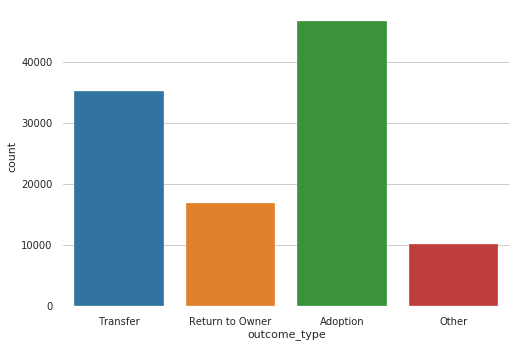

In [ ]:
#OutcomeType countplot
sns.countplot(x = shl.outcome_type)
plt.show()

#adoption이 가장 많음

In [ ]:
round(shl.outcome_type.value_counts(normalize=True)*100,2)
#adoption이 41.90%로 가장 많고 그 다음이 transfer임. 

Adoption           42.89
Transfer           32.32
Return to Owner    15.50
Other               9.29
Name: outcome_type, dtype: float64

In [ ]:
outcome_agg = shl.reset_index().pivot_table(index=['outcome_type','outcome_subtype'], values='animal_id', aggfunc='count').reset_index()
outcome_agg = outcome_agg[(outcome_agg.outcome_type=='Adoption')|(outcome_agg.outcome_type=='Transfer')]
outcome_agg

,outcome_type,outcome_subtype,animal_id
0,Adoption,1,36445
1,Adoption,Barn,3
2,Adoption,Foster,9910
3,Adoption,Offsite,307
22,Transfer,1,23
23,Transfer,Barn,8
24,Transfer,Emer,5
25,Transfer,Partner,29532
26,Transfer,SCRP,3015
27,Transfer,Snr,2584


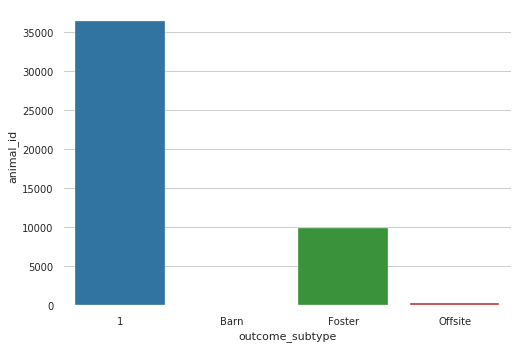

In [ ]:
#outcome type - adoption
sns.barplot(data = outcome_agg[outcome_agg.outcome_type=='Adoption'], x='outcome_subtype', y='animal_id')

#direct(1)가 가장 많고 foster가 그 다음. 
#offsite나 barn의 거의 없음.


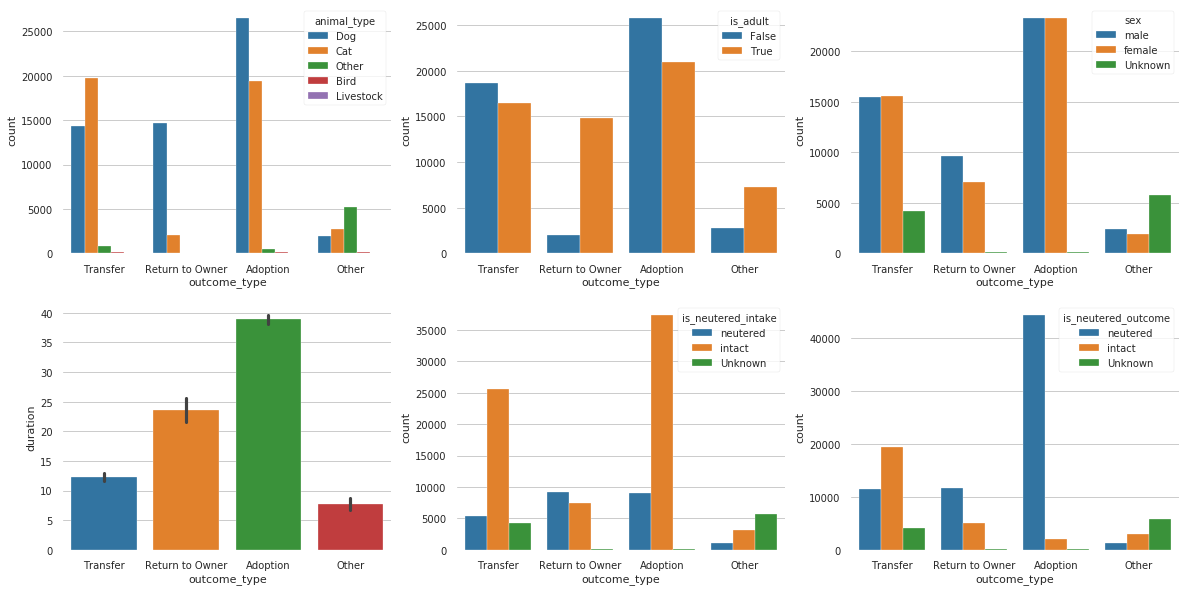

In [ ]:
#OutcomeType by features countplot

fig = plt.figure()
(ax1, ax2, ax3),(ax4,ax5,ax6) = fig.subplots(nrows=2, ncols=3)
fig.set_size_inches(20,10)

sns.countplot(x = shl.outcome_type, hue=shl.animal_type,ax=ax1)
sns.countplot(x = shl.outcome_type, hue=shl.is_adult,ax=ax2)
sns.countplot(x = shl.outcome_type, hue=shl.sex,ax=ax3)
sns.barplot(y=shl.duration,x=shl.outcome_type, ax=ax4)
sns.countplot(x = shl.outcome_type, hue=shl.is_neutered_outcome,ax=ax6)
sns.countplot(x = shl.outcome_type, hue=shl.is_neutered_intake,ax=ax5)


plt.show()



1. 개가 가장 입양이 많이 되고 그 다음으로 고양이가 입양된다. 
2. 고양이가 transfer가 가장 많이 된다. 
3. 어린 동물들이 입양이 더 잘 된다. 주인에게 돌아간 동물들은 1살 이상이 많다. 
4. 성별은 결과에 큰 영향을 미치는 것 같지 않다. 
5. adoption 중에는 중성화 된 동물의 수가 압도적으로 많다.(is_neutered_outcome) 반면 is_neutred_intake에서는 intact의 경우에 입양이 많은데 다수가 보호소에 들어온 이후 중성화 됐다는 것을 보면 이 역시 중성화 된 동물이 입양이 더 많다는 것을 반영한다고 생각할 수 있다. 따라서 is_neutered_intake는 크게 중요하지 않을 듯.
6. adoption이 된 동물들은 보호에 있었던 기간이 가장 긴 편이다. 반면 transfer나 other(대부분 안락사, 사망)은 입소 기간이 짧다. 

**위의 그래프를 통해 animal type, is_adult, is_neutered_outcome, duration이 결과에 영향을 미치는 특성이라고 유추할 수 있다.**

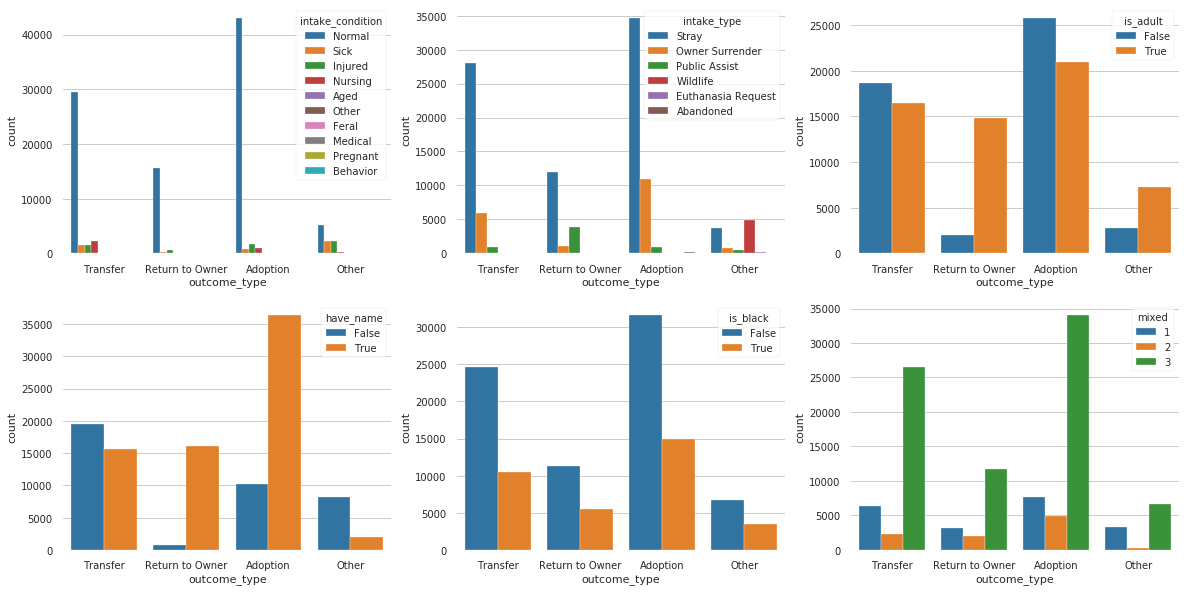

In [ ]:
fig = plt.figure()
(ax1, ax2, ax3),(ax4,ax5,ax6) = fig.subplots(nrows=2, ncols=3)
fig.set_size_inches(20,10)

sns.countplot(x = shl.outcome_type, hue=shl.intake_condition,ax=ax1)
sns.countplot(x = shl.outcome_type, hue=shl.intake_type,ax=ax2)
sns.countplot(x = shl.outcome_type, hue=shl.is_adult,ax=ax3)
sns.countplot(x = shl.outcome_type, hue=shl.have_name,ax=ax4)
sns.countplot(x = shl.outcome_type, hue=shl.is_black,ax=ax5)
sns.countplot(x = shl.outcome_type, hue=shl.mixed,ax=ax6)

plt.show()

1. intake_condition이 normal인 경우가 압도적으로 많은 것 같다. 결과에 큰 영향을 미치진 않을 듯. 
2. inatake_type이 stray인 경우가 많은 것 같다. 그 외 owner surrender가 좀 있는데 확실히 주인이 유기한 경우이다. 이 경우의 동물들은 사람들과 친화적인 상태이기 때문에 stray 다음으로 입양이 많은 것으로 유추할 수 있다. 
3. 모든 결과에서 is_black의 경우 검은 동물보다 그렇지 않은 동물의 수가 많다. 이는 is_black==False인 경우가 더 많기 때문으로 생각할 수 있따. 아마 결과에 큰 영향을 미치지 않는 것으로 생각할 수 있다. 
4. 2014-2019까지 주인에게 돌아가는 경우는 비슷했다. adoption의 수는 2014년부터 2016년까지는 증가하는 추세였다고 그 후로 약간 감소하는 추세이다.(2019년 제외) 2013은 10월부터 있고 2021년은 4월부터 있기 때문에 두 해의 영향력은 알 수 없다. 
5. 입양을 가는 동물 중 이름이 있는 경우가 그렇지 않은 경우보다 많았다. 
6. 결과가 나올 당시의 나이를 봤을 때 주인에게 돌아가는 경우는 나이가 많았고 입양이 되는 경우는 나이가 적었다. 어린 동물이 선호도가 더 높다고 볼 수 있다.
7. mix견의 경우가 모든 결과에서 많게 나온다. 이는 믹스견의 수 자체가 많아서라고 볼 수 있다.

**위의 그래프를 봤을 때 intake_type, have_name, age가 결과에 영향을 미치는 특성이라고 유추할 수 있다.**

### animal type 

Dog          0.528307
Cat          0.404428
Other        0.061631
Bird         0.005459
Livestock    0.000175
Name: animal_type, dtype: float64


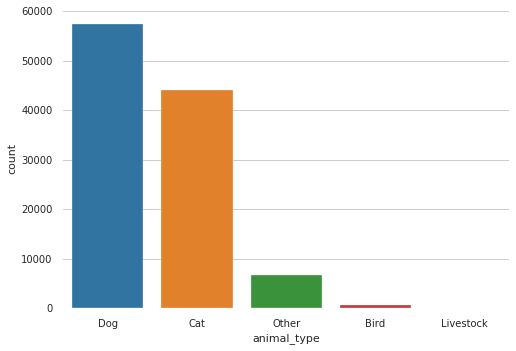

In [ ]:
print(shl.animal_type.value_counts(normalize=True))
sns.countplot(data = shl, x='animal_type')
plt.show()

#개와 고양이의 비율이 90%이상임.
#livestock은 삭제해도 될 듯

In [ ]:
#livestock 삭제
shl = shl.drop(shl[shl.animal_type=='Livestock'].index)

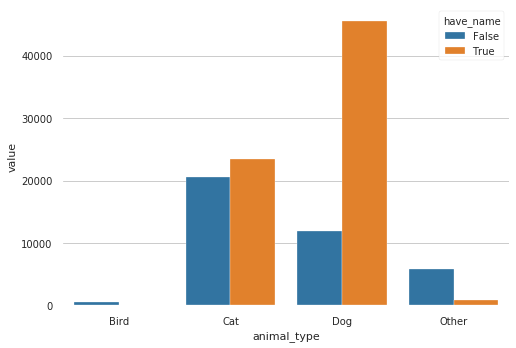

In [ ]:
#mean duration time by animal and have_name
animal_type_p= shl.pivot_table(values='breed', index='animal_type', columns='have_name', aggfunc='count', fill_value=0)
melted_df = pd.melt(animal_type_p.reset_index(), id_vars='animal_type')
sns.barplot(data=melted_df,x='animal_type', y='value', hue='have_name')

#개는 이름이 있는 경우가 그렇지 않은 경우보다 훨씬 많다. 고양이도 이름이 있는 경우가 더 많지만 이름이 없는 경우와 큰 차이가 나지 않는다. 
#다른 동물들은 이름이 거의 없다.

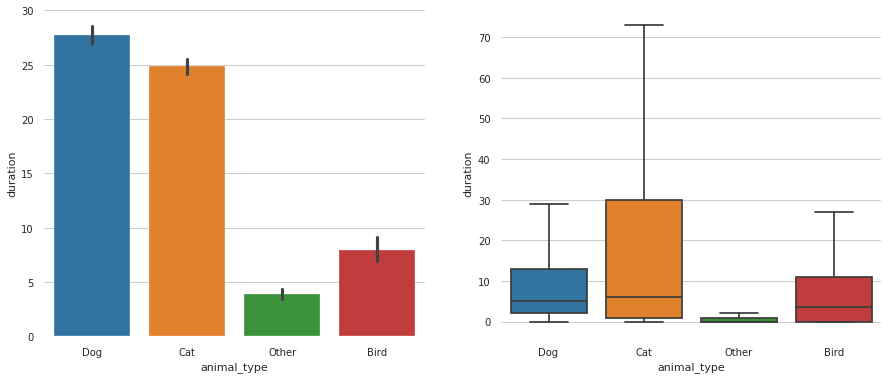

In [ ]:
#결과가 나오는데까지 걸리는 시간 by animal_type
fig = plt.figure()
(ax1, ax2) = fig.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,6)

sns.barplot(data = shl, x='animal_type', y='duration', ax=ax1)
sns.boxplot(data=shl, x='animal_type', y='duration', showfliers=False, ax=ax2)
plt.show()

#adoption에 걸리는 시간이 가장 긴 것을 감안했을 때 개와 고양이가 입양이 많이 되고 결과가 나오는데까지 걸리는 시간이 긴 것이라고 유추할 수 있다.
#이상치를 제거했을 때 개와 고양이의 duration 평균은 비슷하지만 고양이가 분산이 더 크다. 

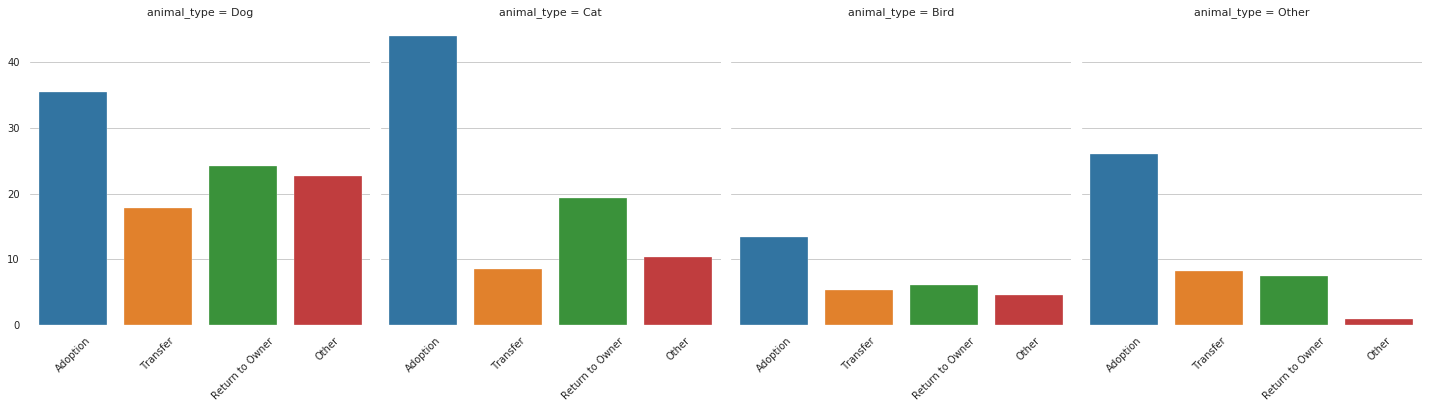

In [ ]:
#동물 타입별 결과가 나오는데까지 걸리는 시간(단위 : 일)
df = shl[['animal_type','duration','outcome_type']].groupby(['animal_type','outcome_type']).mean().reset_index()
df

g = sns.FacetGrid(df, col='animal_type', height=5, aspect=1, col_order=['Dog','Cat','Bird','Other'])

g.map_dataframe(sns.barplot, 
      x='outcome_type',
      y='duration',
      order=['Adoption','Transfer','Return to Owner','Other'],
      ci=None, palette=sns.color_palette(),
      data=df)

g.set_xticklabels(['Adoption','Transfer','Return to Owner','Other'], rotation=45)
g.add_legend()


plt.show()

1. 개의 경우 입양에 걸리는 시간이 가장 길고 주인에게 돌아가는 시간이 그 다음이지만 이 둘은 큰 차이가 없다. transfer에 걸리는 시간이 가장 적다

2. 고양이의 경우 입양에 걸리는 시간이 가장 많고 transfer에 걸리는 시간이 가장 적다. 그 외의 경우도 transfer보다는 오래걸리지만 꽤 빠른 편이다. 

3. 새의 경우는 주인에게 돌아가는 시간이 가장 오래 걸린다. 

4. 가축의 경우 transfer에 걸리는 시간이 가장 길고 주인에게 돌아가는 시간이 가장 짧다. 

5. 그 외의 경우 입양에 걸리는 시간이 가장 오래 걸린다.

**개보다 고양이가 입양에 걸리는 평균 시간이 더 길다 : 개의 입양이 더 빠르다.**  

**고양이가 주인에게 돌아가는 시간이 개보다 더 짧다 : 개는 시간이 좀 걸리더라도 주인이 찾아가는 경우가 있는 반면 고양이는 초반에 주인이 찾아가지 않으면 다른 결과가 나올 가능성이 크다고 유추할 수 있다.**

In [ ]:
#duration이 outlier인 경우

dog_outlier = shl.loc[(shl.animal_type=='Dog')&(shl.duration>30),'outcome_type'].value_counts(normalize=True)
dog_normal = shl.loc[(shl.animal_type=='Dog'),'outcome_type'].value_counts(normalize=True)
cat_outlier = shl.loc[(shl.animal_type=='Cat')&(shl.duration>65),'outcome_type'].value_counts(normalize=True)
cat_normal = shl.loc[(shl.animal_type=='Cat'),'outcome_type'].value_counts(normalize=True)

df = pd.concat([dog_normal,dog_outlier,cat_normal,cat_outlier], axis=1)
df.columns=['dog_normal','dog_outlier','cat_normal','cat_outlier']
df = df.reset_index()
df

,index,dog_normal,dog_outlier,cat_normal,cat_outlier
0,Adoption,0.461033,0.731003,0.441723,0.888427
1,Return to Owner,0.255619,0.085223,0.047426,0.013457
2,Transfer,0.249269,0.158289,0.449154,0.076584
3,Other,0.034079,0.025485,0.061698,0.021532


In [ ]:
melted_df = pd.melt(df, id_vars='index')
melted_df['animal_type']=['dog','dog','dog','dog','dog','dog','dog','dog','cat','cat','cat','cat','cat','cat','cat','cat']
melted_df

,index,variable,value,animal_type
0,Adoption,dog_normal,0.461033,dog
1,Return to Owner,dog_normal,0.255619,dog
2,Transfer,dog_normal,0.249269,dog
3,Other,dog_normal,0.034079,dog
4,Adoption,dog_outlier,0.731003,dog
5,Return to Owner,dog_outlier,0.085223,dog
6,Transfer,dog_outlier,0.158289,dog
7,Other,dog_outlier,0.025485,dog
8,Adoption,cat_normal,0.441723,cat
9,Return to Owner,cat_normal,0.047426,cat


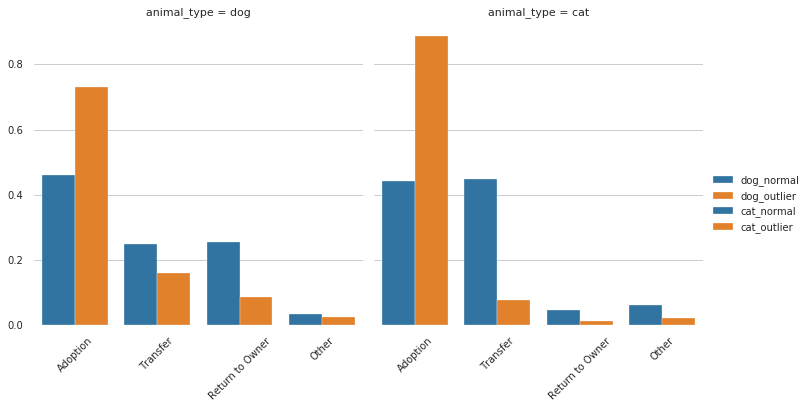

In [ ]:
g = sns.FacetGrid(melted_df, col='animal_type', height=5, aspect=1)

g.map_dataframe(sns.barplot, 
      x='index',
      y='value',
      order=['Adoption','Transfer','Return to Owner','Other'],
      ci=None, palette=sns.color_palette(), hue='variable',
      data=melted_df)

g.set_xticklabels(['Adoption','Transfer','Return to Owner','Other'], rotation=45)
g.add_legend()


plt.show()

**duration이 outlier인 경우 입양확률을 많이 올린다.**

### datetime
- intake_year / month, day
- outcome_year / month, day

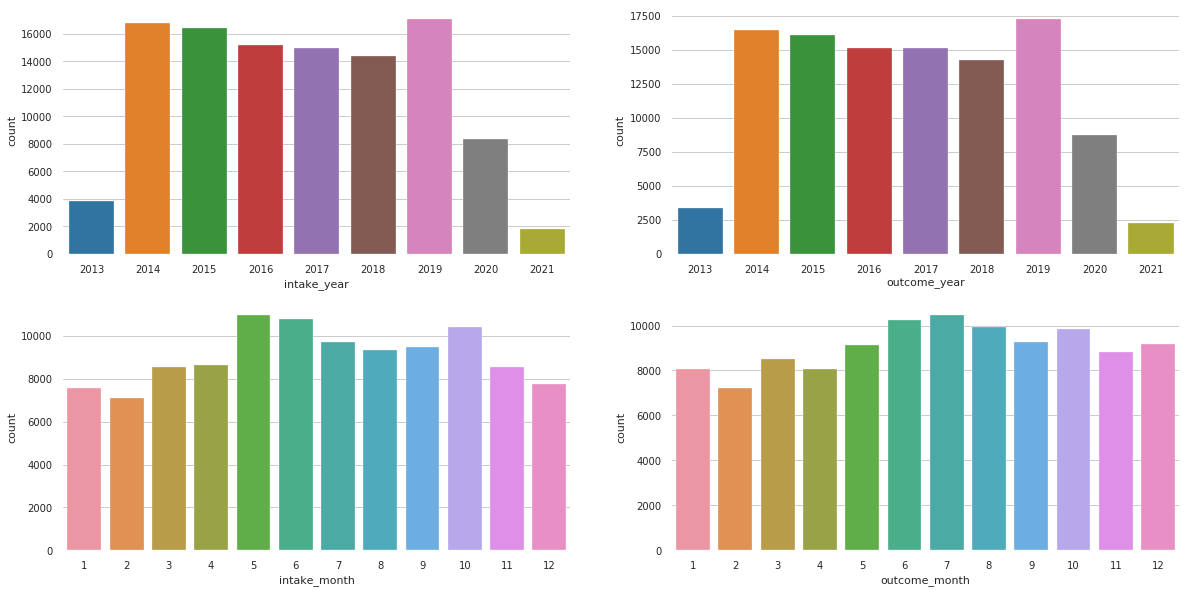

In [ ]:
fig = plt.figure()
(ax1, ax2), (ax3, ax4) = fig.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,10)

sns.countplot(x=shl.intake_year, ax=ax1)
sns.countplot(x=shl.outcome_year, ax=ax2)
sns.countplot(x=shl.intake_month, ax=ax3)
sns.countplot(x=shl.outcome_month, ax=ax4)


1. 10월부터 기록이 시작된 2013년과 기록이 4월까지밖에 없는 2021년을 제외하고 매해 들어오는 개체의 수와 결과가 나오는 개체의 수가 비슷한데 2020년에만 유독 적다. 왜 일까? 코로나 때문일까?
 -> 연도는 별로 중요하지 않아 보인다. 
2. 개체수가 많이 들어오는 달은 5,6,10월이고 결과가 많이 나온 달은 6,7,8, 10월이다. 
 -> 월은 영향을 미칠 것 같음


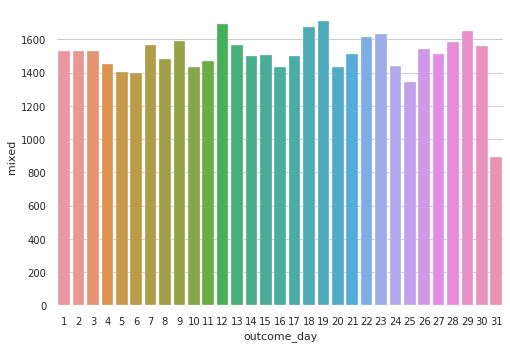

In [ ]:
df = shl.groupby(['outcome_day','outcome_type']).count()['mixed'].reset_index()

sns.barplot(data=df[df.outcome_type=='Adoption'], x='outcome_day',y='mixed')
#day는 큰 영향을 미치지 않은 것으로 보임 

### intake/outcome conditions
- intake_type
- intake_condition
- age_intake_clean
- is_neutered_intake
- age_outcome_clean
- is_neutered_outcome

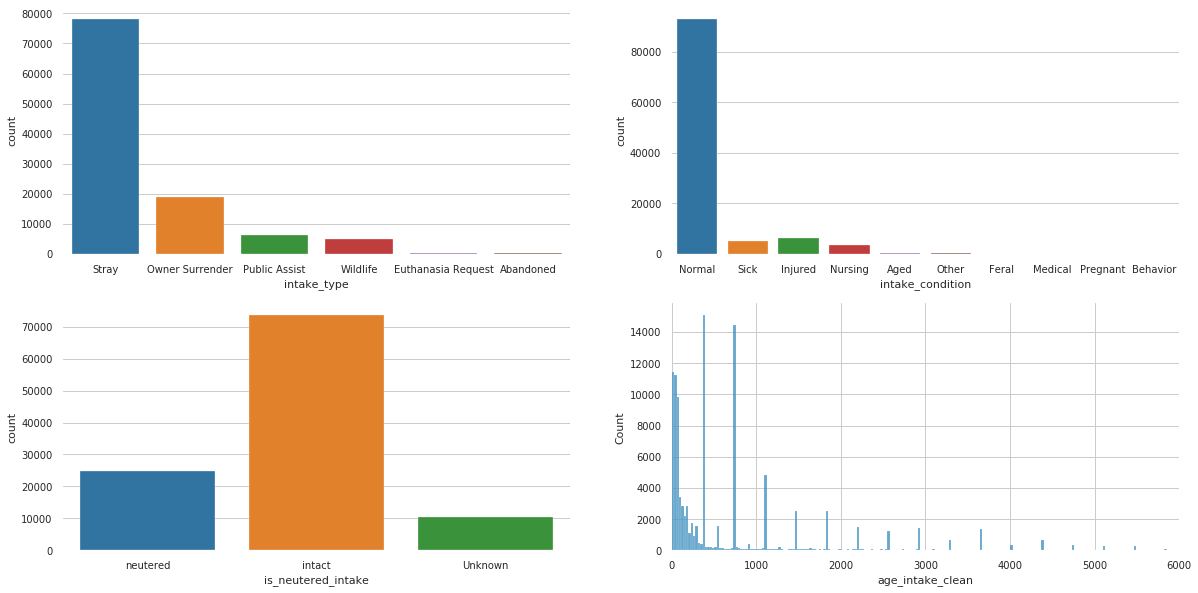

Stray                 0.719604
Owner Surrender       0.172701
Public Assist         0.056458
Wildlife              0.046163
Abandoned             0.002822
Euthanasia Request    0.002252
Name: intake_type, dtype: float64 

Normal      0.857173
Injured     0.057635
Sick        0.045354
Nursing     0.032044
Aged        0.003567
Other       0.001930
Feral       0.000965
Pregnant    0.000653
Medical     0.000552
Behavior    0.000129
Name: intake_condition, dtype: float64


In [ ]:
shl.head()

fig = plt.figure()
(ax1, ax2), (ax3, ax4) = fig.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,10)

sns.countplot(x=shl.intake_type, ax=ax1)
sns.countplot(x=shl.intake_condition, ax=ax2)
sns.countplot(x=shl.is_neutered_intake, ax=ax3)
sns.histplot(x=shl.age_intake_clean, ax=ax4)
ax4.set_xlim(0,6000)

plt.show()

print(shl.intake_type.value_counts(normalize=True),'\n')
print(shl.intake_condition.value_counts(normalize=True))

1. stray의 경우가 가장 많고 그 다음으로 owner_surrender의 경우가 많다. (72%)
2. 들어왔을 때 상태가 normal인 경우가 가장 많다. (86%)

-> intake_type, intake_condition은 크게 영향을 미치지 않을 것으로 보인다. 

3. 처음 들어왔을 때는 중성화가 안 된 경우가 더 많은데 이는 is_neutered_outcome과 비교해봐야 더 정확하게 의미를 파악할 수 있을 것 같다. 
4. 처음 들어왔을 때 나이는 1000일 이하에 거의 몰려있고 중간 중간 선이 올라와 있다. 이건 연속형 변수보다 범주형 변수처럼 보이기도 한다. 

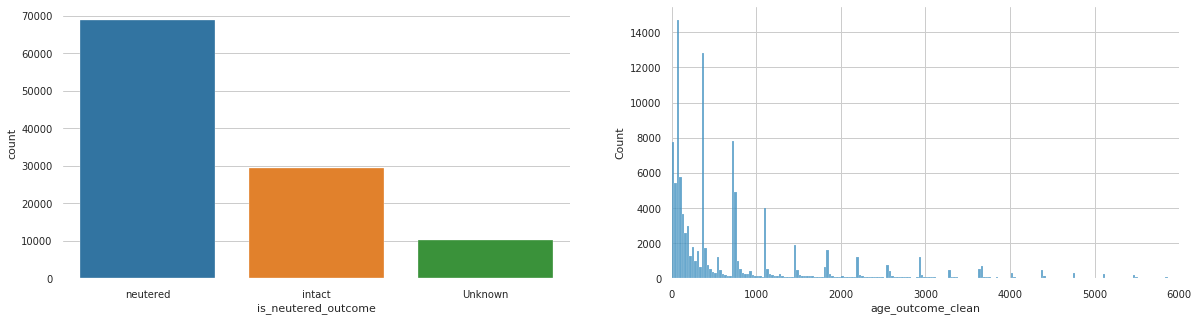

In [ ]:
fig = plt.figure()
(ax1, ax2) = fig.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,5)

sns.countplot(x=shl.is_neutered_outcome, ax=ax1)
sns.histplot(x=shl.age_outcome_clean, ax=ax2)
ax2.set_xlim(0,6000)

plt.show()

#age outcome의 경우도 intake와 양상이 비슷함. 1000일 아래에 몰려있는데, 여기도 연속형보다는 범주형 변수처럼 보임. 일단은 연속형 변수로 해보자.

In [ ]:
df=shl[['is_neutered_intake','is_neutered_outcome']]
con1 = (shl.is_neutered_intake=='neutered') & (shl.is_neutered_intake == shl.is_neutered_outcome)
con2 = (shl.is_neutered_intake=='intact') & (shl.is_neutered_intake == shl.is_neutered_outcome)
con3 = shl.is_neutered_intake != shl.is_neutered_outcome

print(len(df[con1]), len(df[con2]), len(df[con3]))
print(shl.is_neutered_intake.value_counts())
len(df[con3])/shl.is_neutered_intake.value_counts()['intact']*100

#약 60% 정도가 보호소 안에서 중성화 수술을 하였음. -> 입소 당시의 중성화 여부는 별로 중요하지 않을 듯

24841 29501 44116
intact      73617
neutered    24841
Unknown     10331
Name: is_neutered_intake, dtype: int64


59.926375701264654

3    0.725845
1    0.187151
2    0.087003
Name: mixed, dtype: float64

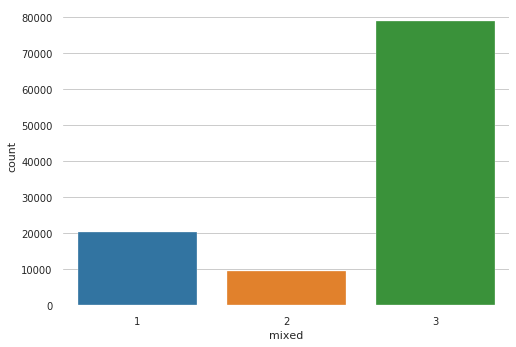

In [ ]:
sns.countplot(x=shl.mixed)
shl.mixed.value_counts(normalize=True)
#mix의 수가 압도적으로 많음(73%), 크게 영향을 줄 것 같지 않음. 

False    0.683111
True     0.316889
Name: is_black, dtype: float64

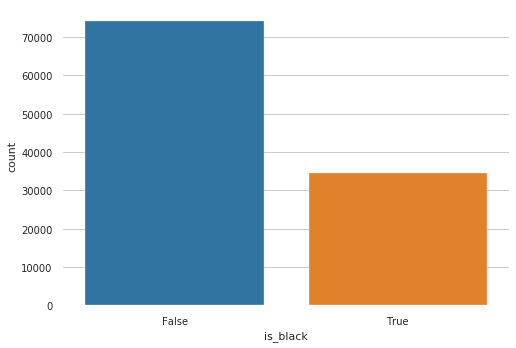

In [ ]:
sns.countplot(x=shl.is_black)
shl.is_black.value_counts(normalize=True)
#black이 아닌 개체 수가 블랙인 개체수보다 2배 정도 더 많음. 크게 영향을 줄 것 같지 않음. 

In [ ]:
shl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108789 entries, A786884 to A827317
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 70063 non-null   object        
 1   intake_datetime      108789 non-null  datetime64[ns]
 2   found_location       108789 non-null  object        
 3   intake_type          108789 non-null  object        
 4   intake_condition     108789 non-null  object        
 5   animal_type          108789 non-null  object        
 6   sex_upon_intake      108789 non-null  object        
 7   age_upon_intake      108789 non-null  object        
 8   breed                108789 non-null  object        
 9   color                108789 non-null  object        
 10  outcome_datetime     108789 non-null  datetime64[ns]
 11  date_of_birth        108789 non-null  datetime64[ns]
 12  sex_upon_outcome     108789 non-null  object        
 13  age_upon_out

## Models

### baseline model

In [ ]:
shl.columns

Index(['name', 'intake_datetime', 'found_location', 'intake_type',
       'intake_condition', 'animal_type', 'sex_upon_intake', 'age_upon_intake',
       'breed', 'color', 'outcome_datetime', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome', 'have_name', 'age_intake_clean',
       'age_outcome_clean', 'is_adult', 'duration', 'intake_year',
       'intake_month', 'intake_day', 'outcome_year', 'outcome_month',
       'outcome_day', 'sex', 'is_neutered_intake', 'is_neutered_outcome',
       'mixed', 'is_black', 'outcome_type', 'outcome_subtype'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(shl, train_size=0.8, test_size=0.2, random_state=42)
train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=42)

target = 'outcome_type'
features = [ 'found_location', 'intake_type','intake_condition', 'animal_type', 'sex_upon_intake', 'age_upon_intake',
       'breed', 'color', 'sex_upon_outcome', 'age_upon_outcome', 'have_name', 'age_intake_clean','age_outcome_clean',
        'is_adult', 'duration', 'intake_year', 'intake_month', 'intake_day', 'outcome_year', 'outcome_month',
       'outcome_day', 'sex', 'is_neutered_intake', 'is_neutered_outcome', 'mixed', 'is_black', 
]

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]



X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((69624, 26), (69624,), (17407, 26), (17407,), (21758, 26), (21758,))

In [ ]:
#baseline model
y_train.value_counts(normalize=True) #Adoption(4)이 가장 많음

Adoption           0.429794
Transfer           0.323983
Return to Owner    0.154085
Other              0.092138
Name: outcome_type, dtype: float64

- target variable의 최빈값이 adoption이므로 이를 베이스라인 모델로 잡았다.

- 평가지표 : f1_score_macro (타겟값이 크게 imabalanced라고 볼 순 없으니까 weighted보다는 macro)

In [ ]:
from category_encoders import OrdinalEncoder
encoder = OrdinalEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
encoder.mapping

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[{'col': 'outcome_type',
  'data_type': dtype('O'),
  'mapping': Return to Owner    1
  Adoption           2
  Transfer           3
  Other              4
  NaN               -2
  dtype: int64}]

**target variable encoder mapping**

Return to Owner    1  / Transfer           2 / Adoption           3 / Other              4 / NaN               -2

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, log_loss

freq=y_train.mode()['outcome_type'][0]
y_pred = [freq]*len(X_train)
score = accuracy_score(y_train, y_pred)
print('baseline accuracy score is', round(score,4))
print('baseline f1_score is', round(f1_score(y_train, y_pred, average='macro'),4))
#베이스라인 모델은 타겟값의 최빈값인 adopton으로 학습하였고 이 때 정확도 0.4298이다.
#f1_score_macro는 0.1503

baseline accuracy score is 0.4298
baseline f1_score is 0.1503


### randomforest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder

pipe = make_pipeline(
    TargetEncoder(min_samples_leaf=10, smoothing=50), 
    RandomForestClassifier(n_estimators=100,
                           max_depth=10,
                           n_jobs=-1, random_state=5, oob_score=True)
)


y_val = encoder.transform(y_val)

pipe.fit(X_train, y_train.values.ravel())
print('검증 정확도: ', pipe.score(X_val, y_val))

y_pred = pipe.predict(X_val)
score = f1_score(y_val, y_pred, average='macro')
print('f1 score is', score,'\n')

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.8038720055150227
f1 score is 0.7936196193769205 



In [ ]:
from category_encoders import OrdinalEncoder, TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform
from sklearn.metrics import f1_score


pipe = make_pipeline(
    TargetEncoder(), 
    RandomForestClassifier(random_state=2)
)


# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),      
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': np.arange(10,20,1), 
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=30, 
    cv=3,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

In [ ]:
pipe=clf.best_estimator_
pipe.fit(X_train, y_train.values.ravel())
y_pred=pipe.predict(X_val)

score = f1_score(y_val, y_pred, average='macro')
print(score)

In [ ]:
pipe.named_steps

In [ ]:
from sklearn.metrics import classification_report

predict_prob=pipe.predict_proba(X_val)
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           1       0.94      0.75      0.83      5768
           2       0.73      0.89      0.80      1594
           3       0.72      0.81      0.76      3318
           4       0.67      0.94      0.78       827

    accuracy                           0.80     11507
   macro avg       0.76      0.85      0.79     11507
weighted avg       0.82      0.80      0.80     11507



### xgboost model

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

pipe = make_pipeline(
    TargetEncoder(min_samples_leaf=10, smoothing=50),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train.values.ravel())

In [ ]:
from sklearn.metrics import classification_report, f1_score
y_pred = pipe.predict(X_val)

encoder = OrdinalEncoder()
y_val = encoder.fit_transform(y_val)

print('검증 정확도: ', accuracy_score(y_val, y_pred))
print('f1 score:', f1_score(y_val, y_pred, average='macro'),'\n')
predict_prob=pipe.predict_proba(X_val)
print(classification_report(y_pred, y_val))

### LGBM model

In [ ]:
from category_encoders import OrdinalEncoder, TargetEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier

pipe = make_pipeline(
    TargetEncoder(min_samples_leaf=10, smoothing=50),
    LGBMClassifier(max_depth=5, n_estimators=100, learning_rate=0.2, random_state=2)
)


In [ ]:
pipe.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['found_location', 'intake_type',
                                     'intake_condition', 'animal_type',
                                     'sex_upon_intake', 'age_upon_intake',
                                     'breed', 'color', 'sex_upon_outcome',
                                     'age_upon_outcome', 'sex',
                                     'is_neutered_intake',
                                     'is_neutered_outcome'],
                               min_samples_leaf=10, smoothing=50.0)),
                ('lgbmclassifier',
                 LGBMClassifier(learning_rate=0.2, max_depth=5,
                                random_state=2))])

In [ ]:
y_pred = pipe.predict(X_val)
print('검증 정확도 :', pipe.score(X_val, y_val))
print('f1_score is', f1_score(y_val, y_pred, average='macro'))


검증 정확도 : 0.8101338541965876
f1_score is 0.8028243394202347


#### baseline model vs randomforest model vs xgboost model vs LightGBM
(Before hyper parameter tuning)


1. accuarcy score
    - baseline : 0.4298
    - rf : 0.8038 
    - xgb : 0.8146
    - lgbm : 0.8101


2. f1 score
    - baseline : 0.1503
    - rf : 0.7936
    - xgb : 0.8064
    - lgbm : 0.8028


**xgb가 가장 성능이 좋음 / 하지만 lgbm이 더 가벼움**

- lgbm after hyperparameter tuning : accuracy : 0.8174 / f1_score : 0.8106


lgbm best params
{'lgbmclassifier__learning_rate': 0.1855018314676833,
 'lgbmclassifier__max_depth': 15,
 'lgbmclassifier__n_estimators': 440,
 'lgbmclassifier__num_leaves': 46,
 'targetencoder__min_samples_leaf': 9,
 'targetencoder__smoothing': 20.0}


 {'lgbmclassifier__learning_rate': 0.20571130974186824,
 'lgbmclassifier__max_depth': 14,
 'lgbmclassifier__n_estimators': 238,
 'lgbmclassifier__num_leaves': 46,
 'targetencoder__min_samples_leaf': 6,
 'targetencoder__smoothing': 2.0}

#### hyper parameter tuning

In [ ]:
clf.best_params_

{'lgbmclassifier__learning_rate': 0.09826812347275582,
 'lgbmclassifier__max_depth': 11,
 'lgbmclassifier__n_estimators': 487,
 'lgbmclassifier__num_leaves': 12,
 'targetencoder__min_samples_leaf': 7,
 'targetencoder__smoothing': 2.0}

In [ ]:
pipe.get_params()

{'lgbmclassifier': LGBMClassifier(learning_rate=0.2, max_depth=5, random_state=2),
 'lgbmclassifier__boosting_type': 'gbdt',
 'lgbmclassifier__class_weight': None,
 'lgbmclassifier__colsample_bytree': 1.0,
 'lgbmclassifier__importance_type': 'split',
 'lgbmclassifier__learning_rate': 0.2,
 'lgbmclassifier__max_depth': 5,
 'lgbmclassifier__min_child_samples': 20,
 'lgbmclassifier__min_child_weight': 0.001,
 'lgbmclassifier__min_split_gain': 0.0,
 'lgbmclassifier__n_estimators': 100,
 'lgbmclassifier__n_jobs': -1,
 'lgbmclassifier__num_leaves': 31,
 'lgbmclassifier__objective': None,
 'lgbmclassifier__random_state': 2,
 'lgbmclassifier__reg_alpha': 0.0,
 'lgbmclassifier__reg_lambda': 0.0,
 'lgbmclassifier__silent': True,
 'lgbmclassifier__subsample': 1.0,
 'lgbmclassifier__subsample_for_bin': 200000,
 'lgbmclassifier__subsample_freq': 0,
 'memory': None,
 'steps': [('targetencoder',
   TargetEncoder(cols=['found_location', 'intake_type', 'intake_condition',
                       'animal

In [ ]:
from category_encoders import OrdinalEncoder, TargetEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier

pipe = make_pipeline(
    TargetEncoder(), 
    LGBMClassifier(random_state=2)
)


# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),      
    'lgbmclassifier__n_estimators': randint(50, 500), 
    'lgbmclassifier__max_depth': np.arange(10,20,1), 
    'lgbmclassifier__learning_rate': uniform(0, 1),
    'lgbmclassifier__num_leaves': randint(6, 50)

}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train.values.ravel());

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
lgbmbest = clf.best_estimator_
lgbmbest.fit(X_train,y_train.values.ravel())

y_pred = lgbmbest.predict(X_val)
print('accuracy :',lgbmbest.score(X_val, y_val))
print('f1_score :', f1_score(y_val, y_pred, average='macro'))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


accuracy : 0.8139828804503935
f1_score : 0.806944723520346


#### permutation importance

In [ ]:
# permuter 정의
from eli5.sklearn import PermutationImportance
permuter = PermutationImportance(
    lgbmbest.named_steps['lgbmclassifier'], 
    scoring='f1_macro' ,
    n_iter=5, 
    random_state=2
)

# preprocessing X_val
X_val_transformed = lgbmbest.named_steps['targetencoder'].transform(X_val)
permuter.fit(X_val_transformed, y_val);

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)


duration               0.168316
intake_type            0.087489
is_neutered_outcome    0.082539
breed                  0.081007
have_name              0.050531
intake_condition       0.029619
age_outcome_clean      0.028818
found_location         0.022122
age_intake_clean       0.017236
animal_type            0.006365
intake_year            0.005750
sex                    0.003505
intake_month           0.002800
outcome_year           0.002404
color                  0.001279
mixed                  0.000820
dtype: float64

In [ ]:
import eli5
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.1683 ± 0.0026,duration
0.0875 ± 0.0053,intake_type
0.0825 ± 0.0049,is_neutered_outcome
0.0810 ± 0.0048,breed
0.0505 ± 0.0063,have_name
0.0296 ± 0.0022,intake_condition
0.0288 ± 0.0018,age_outcome_clean
0.0221 ± 0.0022,found_location
0.0172 ± 0.0028,age_intake_clean
0.0064 ± 0.0020,animal_type


## Final model

In [ ]:
target = 'outcome_type'
features = [ 'found_location', 'intake_type',
       'intake_condition', 'animal_type', 
       'breed', 'color',  'have_name', 'age_intake_clean',
       'age_outcome_clean', 'duration', 'intake_year','outcome_year', 'intake_month',
       'sex', 'is_neutered_outcome',
       'mixed'
]

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

encoder=OrdinalEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((69624, 16), (69624, 1), (17407, 16), (17407, 1), (21758, 16), (21758, 1))

In [ ]:
final = clf.best_estimator_

encoder=OrdinalEncoder()
y_train=encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)

final.fit(X_train, y_train.values.ravel())
print('검증정확도는 ', final.score(X_val, y_val))
y_pred = final.predict(X_val)
print('f1 score macro는', f1_score(y_pred, y_val, average='macro'))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증정확도는  0.8139828804503935
f1 score macro는 0.806944723520346


In [ ]:
X_total = pd.concat([X_train, X_val])
y_total = pd.concat([y_train, y_val])


In [ ]:
final.fit(X_total, y_total.values.ravel())

y_pred = lgbmbest.predict(X_test)
print('f1 score macro는', f1_score(y_pred, y_test, average='macro'))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


f1 score macro는 0.800533813146426


## Result

### PDP

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

In [ ]:
feature = 'duration'
t_encoder = final.named_steps['targetencoder']
X_test_transformed = t_encoder.fit_transform(X_test, y_test)
pdp_df=pd.DataFrame(X_test_transformed)
pdp_df.columns = X_test.columns

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(<Figure size 1080x1080 with 5 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7ff104b940d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff104f17210>})

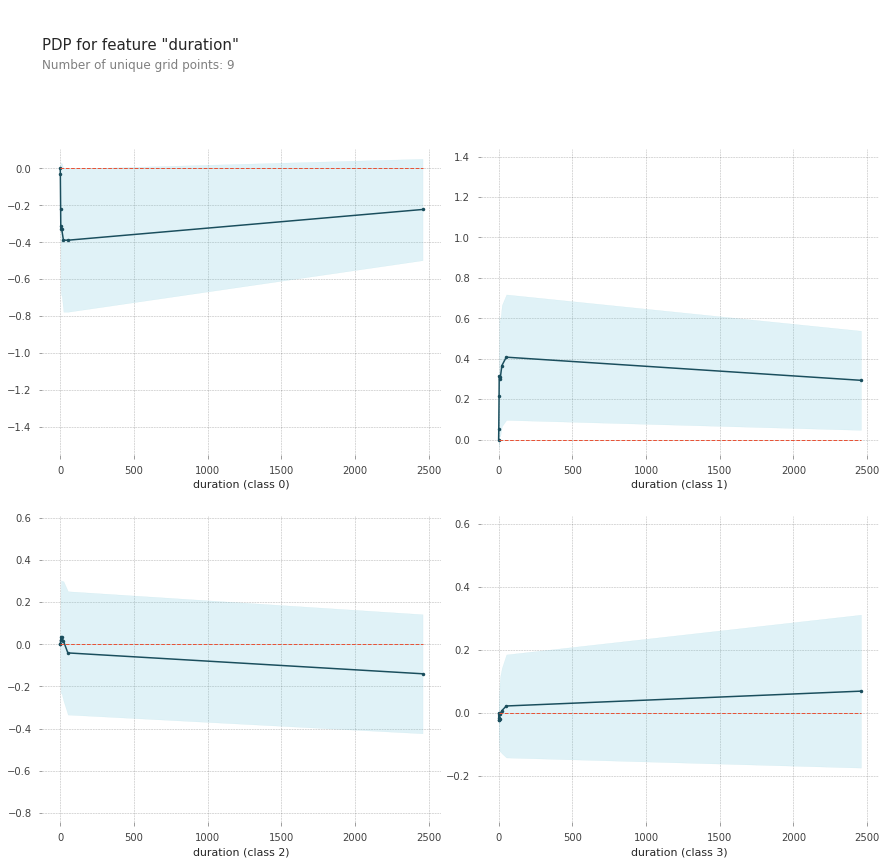

In [ ]:
isolated = pdp_isolate(
    model=final.named_steps['lgbmclassifier'],
    dataset=pdp_df, 
    model_features=pdp_df.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)


(<Figure size 1080x1080 with 5 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7ff10b3ac810>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff107cb7b90>})

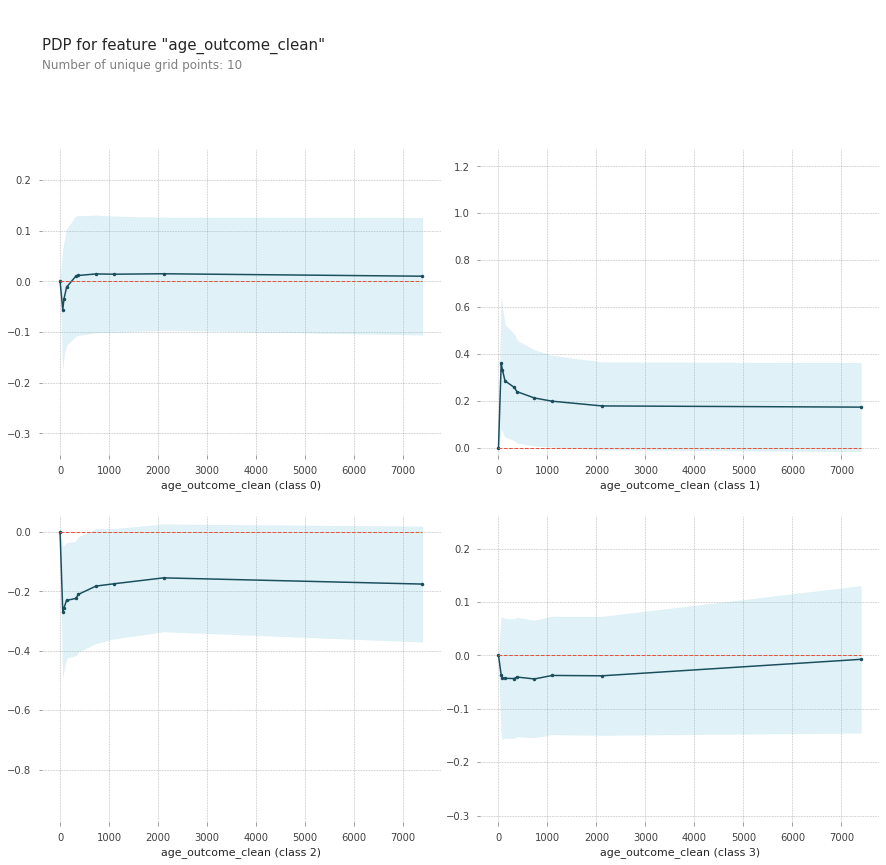

In [ ]:
feature = 'age_outcome_clean'	intake_type	breed

isolated = pdp_isolate(
    model=final.named_steps['lgbmclassifier'],
    dataset=pdp_df, 
    model_features=pdp_df.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)


In [ ]:
df = pd.DataFrame(X_test_transformed.intake_type.unique(),X_test.intake_type.unique())
feature_name = df.index.tolist()
feature_values = df[0].tolist()

(<Figure size 1080x1080 with 5 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7ff106b488d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff10b9675d0>})

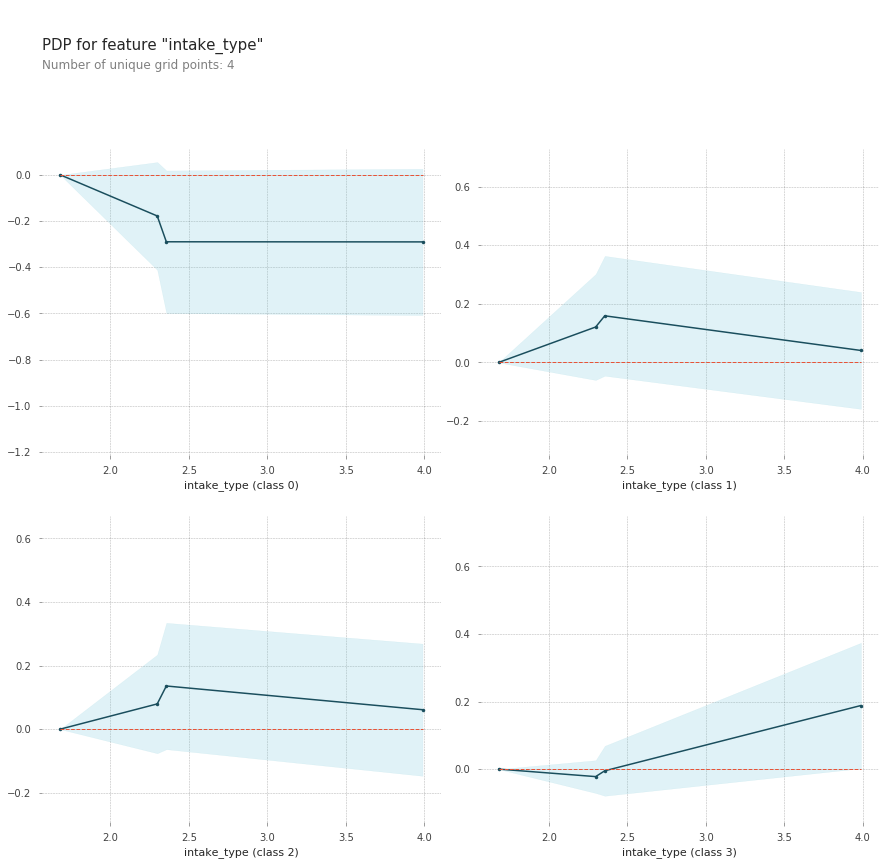

In [ ]:
feature = 'intake_type'


isolated = pdp_isolate(
    model=final.named_steps['lgbmclassifier'],
    dataset=pdp_df, 
    model_features=pdp_df.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)


In [ ]:
X_test_transformed.is_neutered_outcome.value_counts()

2.040230    13746
2.685686     5959
3.537750     2053
Name: is_neutered_outcome, dtype: int64

([<matplotlib.axis.XTick at 0x7ff1072e5dd0>,
 <a list of 3 Text xticklabel objects>)

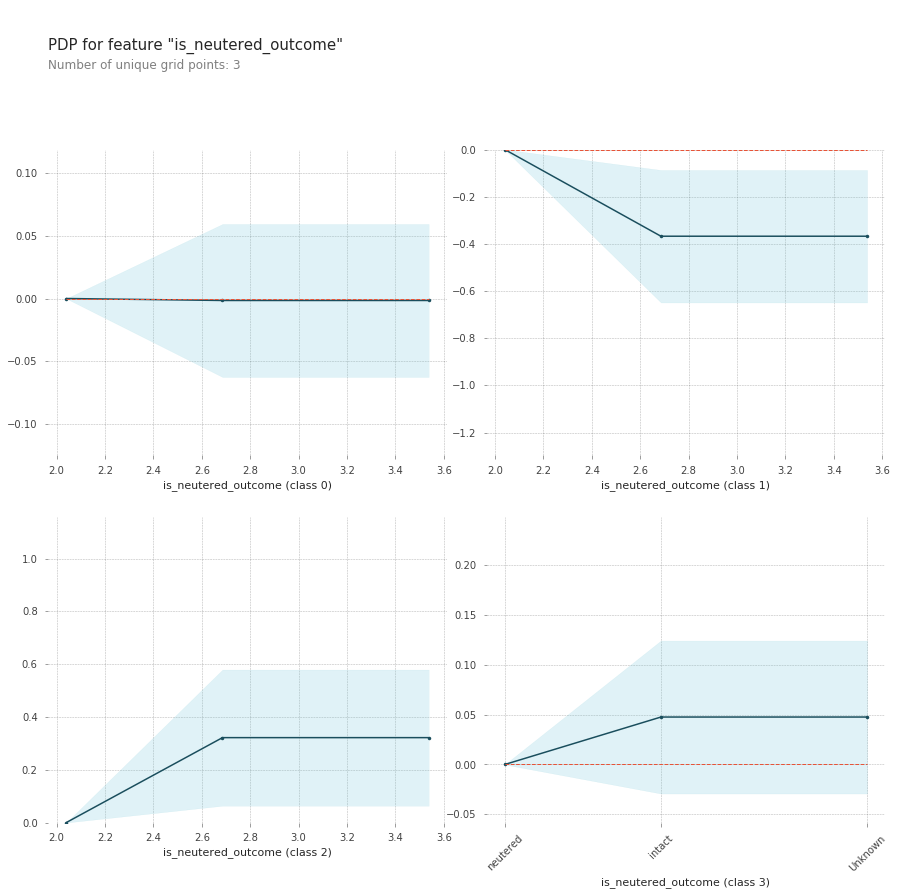

In [ ]:
feature = 'is_neutered_outcome'

df = pd.DataFrame(X_test_transformed.is_neutered_outcome.unique(),X_test.is_neutered_outcome.unique())
feature_name = df.index.tolist()
feature_values = df[0].tolist()

isolated = pdp_isolate(
    model=final.named_steps['lgbmclassifier'],
    dataset=pdp_df, 
    model_features=pdp_df.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)
plt.xticks(feature_values,feature_name, rotation=45)



(<Figure size 1080x1080 with 5 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7ff108d3ce90>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff107870210>})

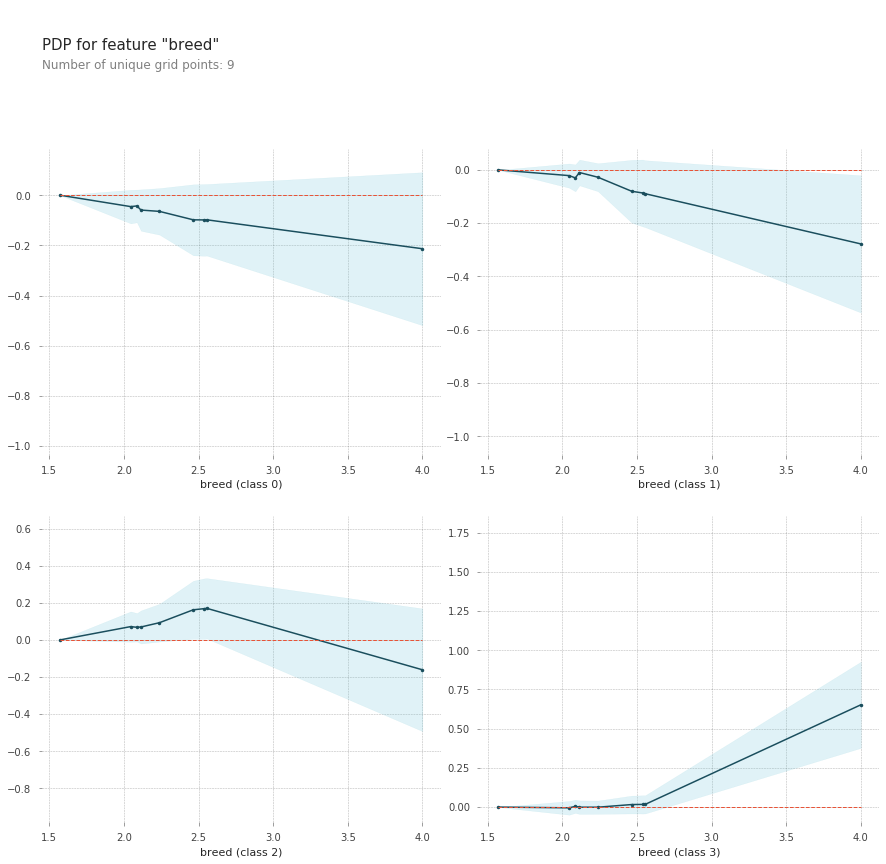

In [ ]:
feature = 'breed'

isolated = pdp_isolate(
    model=final.named_steps['lgbmclassifier'],
    dataset=pdp_df, 
    model_features=pdp_df.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)


In [ ]:
final.named_steps['targetencoder'].mapping

###Shap

In [ ]:
final.predict_proba(X_test)

array([[9.85563641e-01, 5.87253554e-03, 4.93922098e-03, 3.62460262e-03],
       [9.28130988e-01, 1.02837400e-02, 5.40121098e-02, 7.57316232e-03],
       [1.04302594e-02, 9.25138906e-01, 6.37089031e-02, 7.21931486e-04],
       ...,
       [1.83057926e-01, 1.20261998e-01, 6.80043135e-01, 1.66369409e-02],
       [1.90260044e-02, 2.08959891e-01, 6.70177419e-01, 1.01836686e-01],
       [5.78614802e-01, 2.77113795e-01, 1.32379713e-01, 1.18916900e-02]])

In [ ]:
df = pd.DataFrame(final.predict_proba(X_test), columns=['Adoption','RTO','Transfer','Other'])
df['real_outcome'] = test[target].values
df

,Adoption,RTO,Transfer,Other,real_outcome
0,0.985564,0.005873,0.004939,0.003625,Return to Owner
1,0.928131,0.010284,0.054012,0.007573,Return to Owner
2,0.010430,0.925139,0.063709,0.000722,Adoption
3,0.000167,0.997702,0.001822,0.000309,Adoption
4,0.007371,0.031493,0.846066,0.115070,Transfer
...,...,...,...,...,...
21753,0.023530,0.851810,0.122238,0.002422,Adoption
21754,0.980623,0.007188,0.008127,0.004062,Return to Owner
21755,0.183058,0.120262,0.680043,0.016637,Transfer
21756,0.019026,0.208960,0.670177,0.101837,Transfer


In [ ]:
df[(df['RTO']>=0.5) &(df.real_outcome=='Return to Owner')].sort_values('RTO', ascending=False)

,Adoption,RTO,Transfer,Other,real_outcome
1529,0.013805,0.966907,0.017734,0.001555,Return to Owner
3127,0.004894,0.966163,0.028380,0.000563,Return to Owner
8281,0.007315,0.950268,0.041475,0.000941,Return to Owner
20551,0.010650,0.949239,0.034595,0.005516,Return to Owner
9757,0.009110,0.939513,0.050724,0.000654,Return to Owner
...,...,...,...,...,...
15841,0.141099,0.501339,0.249094,0.108469,Return to Owner
8311,0.450641,0.501228,0.039987,0.008144,Return to Owner
14943,0.198704,0.501076,0.289076,0.011144,Return to Owner
15598,0.054463,0.500818,0.408753,0.035966,Return to Owner


In [ ]:
df[(df['Adoption']>=0.5) & (df.real_outcome=='Adoption')].sort_values('Adoption', ascending=False)

,Adoption,RTO,Transfer,Other,real_outcome
5816,0.991871,0.004213,0.003348,0.000569,Adoption
9279,0.989583,0.002717,0.005063,0.002637,Adoption
19910,0.985187,0.005043,0.008261,0.001510,Adoption
3743,0.981044,0.007401,0.010536,0.001020,Adoption
317,0.981034,0.014582,0.004136,0.000248,Adoption
...,...,...,...,...,...
6716,0.513224,0.329520,0.124871,0.032386,Adoption
18671,0.508639,0.309431,0.177197,0.004733,Adoption
20423,0.505636,0.445001,0.030258,0.019104,Adoption
6522,0.504713,0.365445,0.118758,0.011083,Adoption


In [ ]:
import shap

shap.initjs()
model = final.named_steps['lgbmclassifier']
explainer = shap.TreeExplainer(model)
targetencoder=final.named_steps['targetencoder']

X_train_encoded = targetencoder.fit_transform(X_test, y_test)
shap_values = explainer.shap_values(X_train_encoded.iloc[:300])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_train_encoded.iloc[:300])

In [ ]:
row = df.iloc[5493]

Adoption        0.000683116
RTO             0.000201208
Transfer           0.964575
Other              0.034541
real_outcome       Transfer
Name: 5493, dtype: object

In [ ]:
row = X_test_transformed.iloc[[6716]]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values[0],
    features=row,
    link='logit'
)

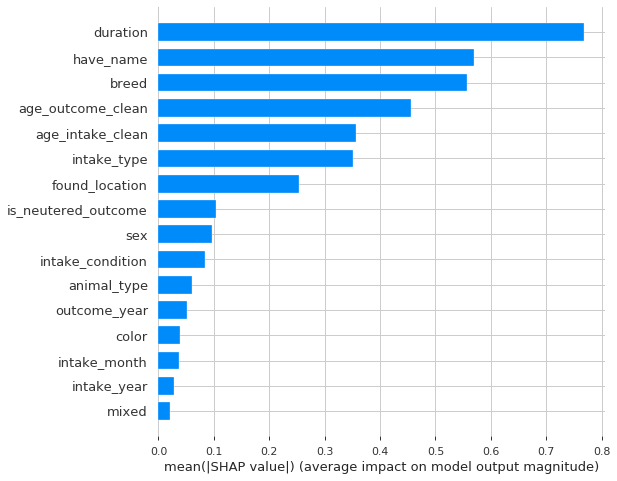

In [ ]:
shap_values = explainer.shap_values(X_test_transformed.iloc[:1000])
shap.summary_plot(shap_values[0], X_test_transformed.iloc[:1000], plot_type='bar')

## 입양예측그래프

In [ ]:
model = final.named_steps['lgbmclassifier']
processor = final.named_steps['targetencoder']

def adoption_explain(row_number):
    positive_class = 1
    positive_class_index = 0

    # row 값을 변환합니다
    row = X_test.iloc[[row_number]]
    row_processed = processor.transform(row)

    # 예측하고 예측확률을 얻습니다 
    pred = model.predict(row_processed)[0]
    
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100

    # 예측결과와 확률값을 얻습니다
    print(f'입양 확률은 {pred_proba:.0f}% 입니다.')
    
    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row_processed)

    # Fully Paid에 대한 top 3 pros, cons를 얻습니다
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0].ravel(), zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # 예측에 가장 영향을 준 top3
    print('\n')
    print('Positive 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장 반대적인 영향을 준 요인 top1
    print('\n')
    print('Negative 영향을 가장 많이 주는 3가지 요인 입니다:')

    evidence = cons if pred == positive_class else pros
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value[0], 
        shap_values=shap_values[0], 
        features=row, 
        link='logit'
    )


In [ ]:
adoption_explain(6716)

입양 확률은 51% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. intake_type : Public Assist
2. breed : Labrador Retriever Mix
3. have_name : True


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. found_location : Outside Jurisdiction
2. animal_type : Dog
3. intake_month : 12
